<a href="https://colab.research.google.com/github/Cobalt9000/Machine-Learning-Cellstrat-assignments/blob/main/Cellstrat_assignment_module_4_DATA_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Module 4: Data Preparation**

Q1) review the training dataset (excel file). Note that weight is missing for 5th row i.e Asian, Height 178cm. Also note that Height is missing for 8th row i.e white, weight 89kgs.

1) what is the value computed by the imputer for these two missing columns

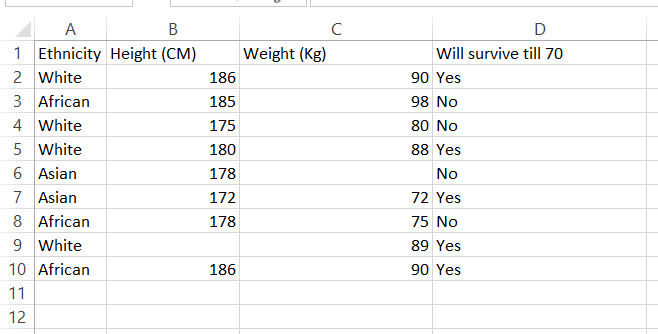

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

healthData = pd.read_csv ('Health.csv')
print(healthData)

  Ethnicity  Height (CM)  Weight (Kg) Will survive till 70
0     White        186.0         90.0                  Yes
1   African        185.0         98.0                   No
2     White        175.0         80.0                   No
3     White        180.0         88.0                  Yes
4     Asian        178.0          NaN                   No
5     Asian        172.0         72.0                  Yes
6   African        178.0         75.0                   No
7     White          NaN         89.0                  Yes
8   African        186.0         90.0                  Yes


In [3]:
X = healthData.iloc [:,:-1].values
y = healthData.iloc [:,3].values

X

array([['White', 186.0, 90.0],
       ['African', 185.0, 98.0],
       ['White', 175.0, 80.0],
       ['White', 180.0, 88.0],
       ['Asian', 178.0, nan],
       ['Asian', 172.0, 72.0],
       ['African', 178.0, 75.0],
       ['White', nan, 89.0],
       ['African', 186.0, 90.0]], dtype=object)

In [4]:
y

array(['Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes'],
      dtype=object)

In [5]:
from sklearn.impute import SimpleImputer
missingValueImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Set which columns imputer should perform
missingValueImputer = missingValueImputer.fit (X[:,1:3])
# update values of X with new values
X[:,1:3] = missingValueImputer.transform(X[:,1:3])

print(X)

[['White' 186.0 90.0]
 ['African' 185.0 98.0]
 ['White' 175.0 80.0]
 ['White' 180.0 88.0]
 ['Asian' 178.0 85.25]
 ['Asian' 172.0 72.0]
 ['African' 178.0 75.0]
 ['White' 180.0 89.0]
 ['African' 186.0 90.0]]


In [6]:
from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
X[:, 0] = X_labelencoder.fit_transform(X[:, 0])
print (X)

[[2 186.0 90.0]
 [0 185.0 98.0]
 [2 175.0 80.0]
 [2 180.0 88.0]
 [1 178.0 85.25]
 [1 172.0 72.0]
 [0 178.0 75.0]
 [2 180.0 89.0]
 [0 186.0 90.0]]


Answer: the program will consider the absent values as NaN and proceed later we use SimpleImputer to consider the missing data as the Average or mean value of the data set and use that value in the program.

1) Answer: The value computed by the imputer for these two missing columns are:-

 85.25kg , 180.0 cm
respectively.

Q2) In the programiming code, find the call to the imputer class. Replace strategy parameter from 'mean' to 'median' and run the output again.

In [8]:
from sklearn.impute import SimpleImputer
missingValueImputer = SimpleImputer(missing_values=np.nan, strategy='median')
# Set which columns imputer should perform
missingValueImputer = missingValueImputer.fit (X[:,1:3])
# update values of X with new values
X[:,1:3] = missingValueImputer.transform(X[:,1:3])

print(X)

[[2 186.0 90.0]
 [0 185.0 98.0]
 [2 175.0 80.0]
 [2 180.0 88.0]
 [1 178.0 85.25]
 [1 172.0 72.0]
 [0 178.0 75.0]
 [2 180.0 89.0]
 [0 186.0 90.0]]


There is no change in the output as shown in the above program.

Q3) Review the code and explain the function of OneHotEncoder.

Code:

In [9]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')

X = np.array(columnTransformer.fit_transform(X), dtype = str)

print(X)

[['0.0' '0.0' '1.0' '186.0' '90.0']
 ['1.0' '0.0' '0.0' '185.0' '98.0']
 ['0.0' '0.0' '1.0' '175.0' '80.0']
 ['0.0' '0.0' '1.0' '180.0' '88.0']
 ['0.0' '1.0' '0.0' '178.0' '85.25']
 ['0.0' '1.0' '0.0' '172.0' '72.0']
 ['1.0' '0.0' '0.0' '178.0' '75.0']
 ['0.0' '0.0' '1.0' '180.0' '89.0']
 ['1.0' '0.0' '0.0' '186.0' '90.0']]


A one-hot encoder that maps a column of category indices to a column of binary vectors, with at most a single one-value per row that indicates the input category index. For example with 5 categories, an input value of 2.0 would map to an output vector of [0.0, 0.0, 1.0, 0.0]

One-hot encoding can be used to transform one or more categorical features into numerical dummy features useful for training machine learning model. One-hot encoding is also called dummy encoding due to the fact that the transformation of categorical features results into dummy features. OneHotEncoder class of sklearn.

By this way instead of classifying the asian,african,white in the numerical way and making them have different values which is bad way of differentiating because then the class with higher number might get more priority in the program or be the dominating class therefore we use this method of classification. (Since all the classes will have the same value and no class will dominate over the other.)

Q4) After OneHotEncoder code in the tutorial, why does the array X has 5 columns instead of 3 columns as before

Answer: The classes are shown in such way when you add them you will always get the same value. In short the first column of Ethnicity is now divided into 3 parts where each stores a value. They  are unique to different class but have the same value so none of the classes dominate over the other in any way. (and can be differentiated with other class.) 

Example: Here the classes are 
1. African i.e [1.0],[0.0],[0.0]
2. Asian i.e [0.0],[1.0],[0.0]
3. White i.e [0.0],[0.0],[1.0]

Q5) the function train_test_split is splitting data into 20% test data and 80% training data. Try test_size of 0.3 instead, run the program again and explain the output of the program.

***Code before changing it to 0.3***

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2,
                                                     random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
X_train = independent_scalar.fit_transform (X_train) #fit and transform
X_test = independent_scalar.transform (X_test) # only transform
print(X_train)

[[ 1.15470054 -0.63245553 -0.63245553  0.88159065  1.48988518]
 [-0.8660254   1.58113883 -0.63245553 -0.55834074 -0.02546812]
 [ 1.15470054 -0.63245553 -0.63245553  1.08729513  0.53907526]
 [ 1.15470054 -0.63245553 -0.63245553 -0.55834074 -1.24369333]
 [-0.8660254  -0.63245553  1.58113883 -0.14693177  0.30137279]
 [-0.8660254  -0.63245553  1.58113883  1.08729513  0.53907526]
 [-0.8660254   1.58113883 -0.63245553 -1.79256765 -1.60024704]]


***Code after changing it to 0.3***

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3,
                                                     random_state = 0)

In [15]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
X_train = independent_scalar.fit_transform (X_train) #fit and transform
X_test = independent_scalar.transform (X_test) # only transform
print(X_train)

[[-0.70710678  1.41421356 -0.70710678 -0.40824829  0.25992461]
 [ 1.41421356 -0.70710678 -0.70710678  1.22474487  0.9184003 ]
 [ 1.41421356 -0.70710678 -0.70710678 -0.40824829 -1.16099661]
 [-0.70710678 -0.70710678  1.41421356  0.          0.64114738]
 [-0.70710678 -0.70710678  1.41421356  1.22474487  0.9184003 ]
 [-0.70710678  1.41421356 -0.70710678 -1.63299316 -1.57687599]]


**Observation:** 
the value of the train data set changes. now it is 30% test data and 70% training data compared to 20 , 80% in the previous case. 

now the present data set is more practical then the previous case where we took only 20% of the test data.